## DATA 512 - Human Centered Data Science / Autumn 2020 / University of Washington

### In-class Activity 3

Group Members:
- Megan Nalani Chun
- Liem Luong
- Juan Solorio
- Qinglang Ye


ANALYSIS: Analyzing relationships between worker demographics and labeling behavior from the Toxicity dataset

--------------------------------------------------------

Import the libraries

In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

Input Toxicity data files into data frames

In [2]:
# TOXICITY ANNOTATIONS
df_toxicity_ann = pd.read_csv('toxicity_annotations.tsv', sep = '\t')

# TOXICITY ANNOTATED COMMENTS
df_toxicity_com = pd.read_csv('toxicity_annotated_comments.tsv', sep = '\t')

# TOXICITY WORKER DEMOGRAPHICS
df_toxicity_dem = pd.read_csv('toxicity_worker_demographics.tsv', sep = '\t')

Format the data and clean up

In [3]:
# TOXICITY ANNOTATIONS
# Reformat the numeric values to remove the ".0"
df_toxicity_ann = df_toxicity_ann.astype(int)

# TOXICITY ANNOTATED COMMENTS
# Reformat the numeric values to remove the ".0"
df_toxicity_com['rev_id'] = df_toxicity_com['rev_id'].astype(int)

# remove newline and tab tokens
df_toxicity_com['comment'] = df_toxicity_com['comment'].apply(lambda x: x.replace("NEWLINE_TOKEN", " "))
df_toxicity_com['comment'] = df_toxicity_com['comment'].apply(lambda x: x.replace("TAB_TOKEN", " "))

Merge three files into one data frame

In [4]:
# Merge the data frame of toxicity annotation and demographic worker
df_ann_dem = pd.merge(df_toxicity_ann, df_toxicity_dem, on = 'worker_id', how = 'outer')

# Merge the result with the comment data frame
df_final = pd.merge(df_ann_dem, df_toxicity_com, on = 'rev_id', how = 'outer')

In [5]:
df_final

,rev_id,worker_id,toxicity,toxicity_score,gender,english_first_language,age_group,education,comment,year,logged_in,ns,sample,split
0,2232,723,0,0,female,0.0,30-45,bachelors,This: :One can make an analogy in mathematical...,2002,True,article,random,train
1,2232,4000,0,0,male,1.0,18-30,hs,This: :One can make an analogy in mathematical...,2002,True,article,random,train
2,2232,3989,0,1,female,0.0,18-30,bachelors,This: :One can make an analogy in mathematical...,2002,True,article,random,train
3,2232,3341,0,0,NaN,NaN,NaN,NaN,This: :One can make an analogy in mathematical...,2002,True,article,random,train
4,2232,1574,0,1,female,0.0,30-45,bachelors,This: :One can make an analogy in mathematical...,2002,True,article,random,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598284,545868776,2229,1,-1,NaN,NaN,NaN,NaN,== is vandalizing and has conflict of inte...,2013,True,article,blocked,dev
1598285,545868776,3609,0,1,male,0.0,30-45,professional,== is vandalizing and has conflict of inte...,2013,True,article,blocked,dev
1598286,545868776,2222,1,-1,female,0.0,18-30,bachelors,== is vandalizing and has conflict of inte...,2013,True,article,blocked,dev
1598287,545868776,4231,0,0,female,1.0,30-45,hs,== is vandalizing and has conflict of inte...,2013,True,article,blocked,dev


There are some NaN value for the following columns: gender, english_first_language, age_group, education.
Let's find out how many rows in the dataset that are NaN for these workers

In [6]:
# count the number of NaN value of gender column
count_NaN = df_final.isnull().sum()

count_NaN

rev_id                         0
worker_id                      0
toxicity                       0
toxicity_score                 0
gender                    251334
english_first_language    251334
age_group                 280648
education                 251334
comment                        0
year                           0
logged_in                      0
ns                             0
sample                         0
split                          0
dtype: int64

Any data with NaN in the dataset won't be helpful and can create a distortion.
We need to drop these NaN (not a number rows) from the data frame since it won't be helpful for the analysis

In [7]:
df_new_final = df_final.dropna()

In [8]:
df_new_final

,rev_id,worker_id,toxicity,toxicity_score,gender,english_first_language,age_group,education,comment,year,logged_in,ns,sample,split
0,2232,723,0,0,female,0.0,30-45,bachelors,This: :One can make an analogy in mathematical...,2002,True,article,random,train
1,2232,4000,0,0,male,1.0,18-30,hs,This: :One can make an analogy in mathematical...,2002,True,article,random,train
2,2232,3989,0,1,female,0.0,18-30,bachelors,This: :One can make an analogy in mathematical...,2002,True,article,random,train
4,2232,1574,0,1,female,0.0,30-45,bachelors,This: :One can make an analogy in mathematical...,2002,True,article,random,train
5,2232,1508,0,1,female,1.0,45-60,hs,This: :One can make an analogy in mathematical...,2002,True,article,random,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598283,545868776,4205,0,0,male,1.0,30-45,professional,== is vandalizing and has conflict of inte...,2013,True,article,blocked,dev
1598285,545868776,3609,0,1,male,0.0,30-45,professional,== is vandalizing and has conflict of inte...,2013,True,article,blocked,dev
1598286,545868776,2222,1,-1,female,0.0,18-30,bachelors,== is vandalizing and has conflict of inte...,2013,True,article,blocked,dev
1598287,545868776,4231,0,0,female,1.0,30-45,hs,== is vandalizing and has conflict of inte...,2013,True,article,blocked,dev


In [9]:
# Get names of indexes for which column gender has value other
indexNames = df_new_final[ df_new_final['gender'] == 'other' ].index

# Delete these row indexes from dataFrame
df_new_final.drop(indexNames , inplace=True)

C:\Users\lieml\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Generate a pivot table between data fields

In [10]:
# Create a pivot table to answer the exploratory question 
pd.pivot_table(df_new_final, values =['toxicity'], index=['toxicity_score'], columns=['gender'], aggfunc='count')

toxicity        
gender           female    male
toxicity_score                 
-2                13787   21564
-1                56300  100316
 0               217921  419032
 1               151632  317528
 2                 6465   12738

Plot the chart to compare between female and male

<Figure size 1080x648 with 0 Axes>

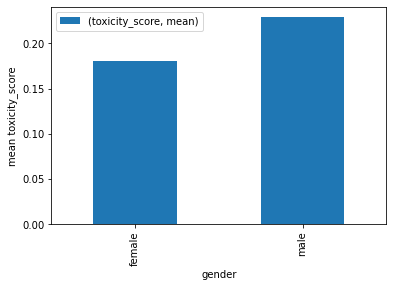

In [11]:
# Plot an aggregate visualization to answer the exploratory question
plt.figure(figsize=(15,9))
df_new_final[['gender', 'toxicity_score']].groupby('gender').agg(['mean']).plot.bar()
plt.xlabel('gender')
plt.ylabel('mean toxicity_score')

plt.legend(loc=2);